# Library

In [1]:
from Python_Library.library import MLP
import matplotlib.pyplot as plt

## Cas de test

### Classification Linéaire avec un PMC (sans couche cachée)

In [8]:
test_1_all_samples_inputs = [
    [0, 0],
    [0, 1],
    [1, 0]
]
test_1_all_samples_expected_outputs = [
    [1],
    [-1],
    [-1]
]

In [9]:
test1_mlp = MLP([2, 1])

In [10]:
for sample_inputs in test_1_all_samples_inputs:
  print(test1_mlp.predict(sample_inputs, True))

[-0.5726771980675031]
[-0.7760167902280639]
[-0.813246250449239]


In [11]:
data = test1_mlp.fit(test_1_all_samples_inputs, test_1_all_samples_expected_outputs, True, 100, 0.01)

In [6]:
print(data)

{'loss': [1.5818071454272569, 0.5543407139807225, 0.5447132387521862, 0.5353207695345098, 0.5261572066809092, 1.5913533318796533, 1.5362603674857707, 0.5487051570502555, 1.497991756994661, 1.4441500491381378], 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


In [6]:
for sample_inputs in test_1_all_samples_inputs:
  print(test1_mlp.predict(sample_inputs, True))

[0.15412798506280195]
[-0.4784760037938338]
[0.11869545974384102]


### Classification Non Linéaire (XOR) avec un PMC

In [2]:
test_2_all_samples_inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
test_2_all_samples_expected_outputs = [
    [-1],
    [1],
    [1],
    [-1]
]

In [3]:
test2_mlp = MLP([2, 2, 1])

In [4]:
for sample_inputs in test_2_all_samples_inputs:
  print(test2_mlp.predict(sample_inputs, True))

[-0.1465149427824706]
[0.575177383695049]
[-0.4724421415888447]
[0.3646451610248691]


In [5]:
test2_mlp.fit(test_2_all_samples_inputs, test_2_all_samples_expected_outputs, True, 100000, 0.01)

In [6]:
for sample_inputs in test_2_all_samples_inputs:
  print(test2_mlp.predict(sample_inputs, True))

[-0.9736293378370515]
[0.9744103389798404]
[-0.001015576182950436]
[0.0014669634727310997]


### Régression Linéaire avec un PMC (sans couche cachée)

In [13]:
test_3_all_samples_inputs = [
    [0, 0],
    [0, 1],
    [1, 0]
]
test_3_all_samples_expected_outputs = [
    [42],
    [51],
    [19]
]

In [14]:
test3_mlp = MLP([2, 1])

In [15]:
for sample_inputs in test_3_all_samples_inputs:
  print(test3_mlp.predict(sample_inputs, False))

[-0.3571417043225156]
[0.2647861855530549]
[0.5746175995623426]


In [16]:
test3_mlp.fit(test_3_all_samples_inputs, test_3_all_samples_expected_outputs, False, 100000, 0.01)

In [17]:
for sample_inputs in test_3_all_samples_inputs:
  print(test3_mlp.predict(sample_inputs, False))

[41.999999999999645]
[51.000000000000085]
[19.000000000000178]


### Régression Non Linéaire avec un PMC

In [18]:
test_4_all_samples_inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]
test_4_all_samples_expected_outputs = [
    [42],
    [51],
    [19],
    [5],
]

In [19]:
test4_mlp = MLP([2, 5, 1])

In [20]:
for sample_inputs in test_4_all_samples_inputs:
  print(test4_mlp.predict(sample_inputs, False))

[0.30410099877403096]
[0.21404427119358904]
[0.3456457229367757]
[0.24451115338824014]


In [21]:
test4_mlp.fit(test_4_all_samples_inputs, test_4_all_samples_expected_outputs, False, 100000, 0.01)

In [22]:
for sample_inputs in test_4_all_samples_inputs:
  print(test4_mlp.predict(sample_inputs, False))


[42.0]
[50.999999999999986]
[19.0]
[5.000000000000002]


## Test function categorical accuracy

In [2]:
test5_inputs = [
    [0, 0],
    [0, 1],
    [1, 0]
]

test5_outputs = [
    [-1, -1],
    [-1, -1],
    [1, -1]
]

In [3]:
test5_mlp = MLP([2,2])

In [4]:
data = test5_mlp.fit(test5_inputs, test5_outputs, (test5_inputs, test5_outputs), True, 100, 0.2)

In [5]:
print(data['accuracy'][-1])

0.99


In [6]:
print("----- predictions ------")
for sample in test5_inputs:
    print(test5_mlp.predict(sample, True))

----- predictions ------
[-0.8034614521920564, -0.9245804304846815]
[-0.8875063316371511, -0.894089493984124]
[0.7721880963579137, -0.9574066719549897]


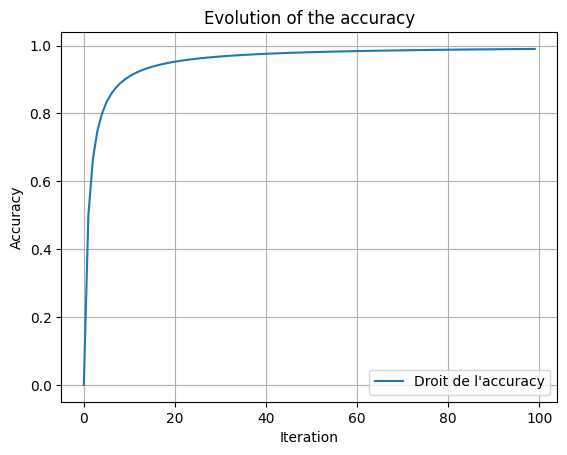

In [7]:
plt.plot(range(len(data['accuracy'])), data['accuracy'], label='Droit de l\'accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Evolution of the accuracy')
plt.legend()
plt.grid()
plt.show()

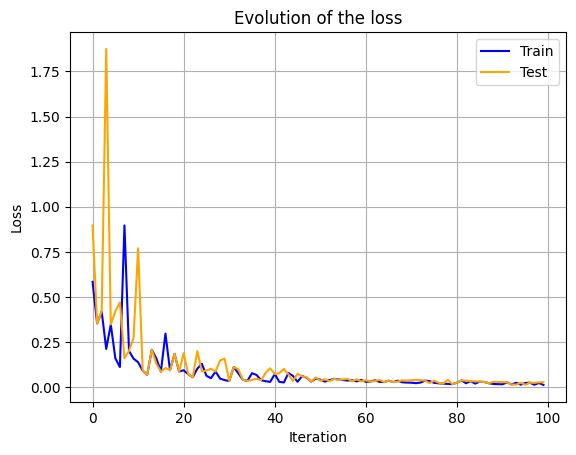

In [9]:
plt.plot(range(len(data['loss'])), data['loss'], label='Train', color='blue')
plt.plot(range(len(data['validation_loss'])), data['validation_loss'], label='Test', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Evolution of the loss')
plt.legend()
plt.grid()
plt.show()

## Sweet o meter DATASET

In [2]:
import os
from Python_Library.library import MLP
from Utils.tools import image_to_matrix
import matplotlib.pyplot as plt

In [3]:
inputs = []
outputs = []
validation = ([], [])

### Get all Datas

In [4]:
for i in range(3):
    if i == 0:
        folder = "../Data/Datasets/50x50/Churros"
        for y in range(1, 18528):
            file = os.path.join(folder, f"image_{y}.jpg")
            if not os.path.exists(file):
                print(f"File : {file} n'existe pas")
            else:
                inputs.append(image_to_matrix(file, False))
                outputs.append([1., -1., -1.])
        folder = "../Data/Datasets/50x50/Churros_validation"
        for y in range(1, 2059):
            file = os.path.join(folder, f"image_{y}.jpg")
            if not os.path.exists(file):
                print(f"File : {file} n'existe pas")
            else:
                validation[0].append(image_to_matrix(file, False))
                validation[1].append([1., -1., -1.])

    if i == 1:
        folder = "../Data/Datasets/50x50/Apple_candy"
        for y in range(1, 19952):
            file = os.path.join(folder, f"image_{y}.jpg")
            if not os.path.exists(file):
                print(f"File : {file} n'existe pas")
            else:
                inputs.append(image_to_matrix(file, False))
                outputs.append([-1., 1., -1.])
        folder = "../Data/Datasets/50x50/Apple_candy_validation"
        for y in range(1, 1899):
            file = os.path.join(folder, f"image_{y}.jpg")
            if not os.path.exists(file):
                print(f"File : {file} n'existe pas")
            else:
                validation[0].append(image_to_matrix(file, False))
                validation[1].append([-1., 1., -1.])

    if i == 2:
        folder = "../Data/Datasets/50x50/Cotton_candy"
        for y in range(1, 20989):
            file = os.path.join(folder, f"image_{y}.jpg")
            if not os.path.exists(file):
                print(f"File : {file} n'existe pas")
            else:
                inputs.append(image_to_matrix(file, False))
                outputs.append([-1., -1., 1.])
        folder = "../Data/Datasets/50x50/Cotton_candy_validation"
        for y in range(1, 2334):
            file = os.path.join(folder, f"image_{y}.jpg")
            if not os.path.exists(file):
                print(f"File : {file} n'existe pas")
            else:
                validation[0].append(image_to_matrix(file, False))
                validation[1].append([-1., -1., 1.])

print(f"------------------------\n Data Loaded : {len(inputs)} \n------------------------")

File : ../Data/Datasets/50x50/Apple_candy/image_306.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_8146.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_8147.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_8859.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_9558.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_9559.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_10173.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_10251.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_10252.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_10253.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_10254.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_10255.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_10256.jpg n'existe pas
File : ../Data/Datasets/50x50/Apple_candy/image_10257.jpg n'existe pas
File : ../Dat

### Init Model

In [10]:
model = MLP([7500, 256, 128, 64, 32, 16, 8, 3])

### Training

In [11]:
data = model.fit(inputs, outputs, validation, True, 100, 0.001)

print(f"------------------------\n Accuracy : {round(sum(data['accuracy']) / len(data['accuracy']), 3)} ")
print(f"Test Accuracy : {round(sum(data['validation_accuracy']) / len(data['validation_accuracy']), 3)} \n"
      f"------------------------")
son = "../Data/mixkit-sci-fi-confirmation-914.wav"
command = f"afplay {son}"
os.system(command)

------------------------
 Accuracy : 0.433 
Test Accuracy : 0.343 
------------------------


0

### Accuracy

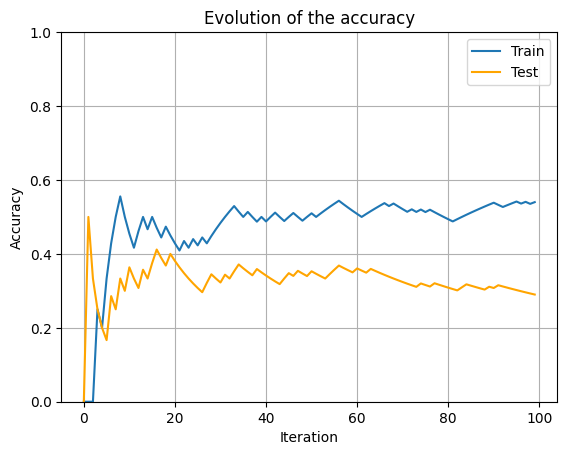

In [187]:
plt.plot(range(len(data['accuracy'])), data['accuracy'], label='Train')
plt.ylim(0.0, 1.0)
plt.plot(range(len(data['validation_accuracy'])), data['validation_accuracy'], label='Test', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Evolution of the accuracy')
plt.legend()
plt.grid()
plt.show()

### Loss

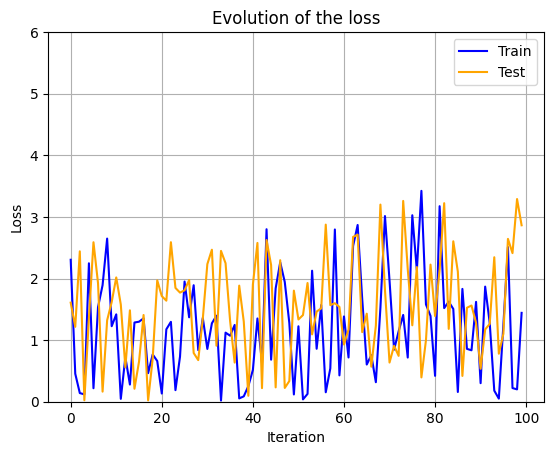

In [12]:
plt.plot(range(len(data['loss'])), data['loss'], label='Train', color='blue')
plt.plot(range(len(data['validation_loss'])), data['validation_loss'], label='Test', color='orange')
plt.ylim(0.0, 6.0)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Evolution of the loss')
plt.legend()
plt.grid()
plt.show()


### Save

In [13]:
model.save("model_rgb_s50.json")
